# Exploratory Data Analysis on IPL Datasets

## About Dataset

This dataset offers a rich resource for anyone interested in diving deep into the Indian Premier League (IPL), which is one of the best franchise cricket league in India organised by BCCI(Board of Control for Cricket in Inida). This tournament is organised during March to May in every year. The bast players around the world played for 8 different teams participated in this tournamet . The matches are played in different cities of India as home and away basis.

This dataset contains information for 13 seasons 2008 to 2020. The IPL dataset comprises two main components:

1. the matches dataset
2. the ball-by-ball dataset.

These datasets collectively provide a comprehensive overview of the IPL matches and detailed ball-by-ball action, allowing for an in-depth analysis of various aspects of the game.

## Data Dictionary

### Matches Dataset

This dataset provides a high-level summary of each IPL match. The columns are as follows:

* **id** (int64): Unique identifier for each match.
* **city** (object): The city where the match was played.
* **date** (object): The date on which the match was played.
* **player_of_match** (object): The player who was awarded the 'Player of the Match'.
* **venue** (object): The stadium where the match was played.
* **neutral_venue** (int64): Indicator if the venue was neutral (1) or not (0).
* **team1** (object): The first team competing in the match.
* **team2** (object): The second team competing in the match.
* **toss_winner** (object): The team that won the toss.
* **toss_decision** (object): The decision made by the toss winner (bat or field).
* **winner** (object): The team that won the match.
* **result** (object): The result of the match (e.g., normal, tie, no result).
**result_margin** (float64): The margin by which the match was won (runs or wickets).
* **eliminator** (object): Indicates if the match was an eliminator or not (Y/N).
* **method** (object): The method used if the match was decided by a method like Duckworth-Lewis.
* **umpire1** (object): Name of the first umpire.
* **umpire2** (object): Name of the second umpire.

### Ball to Ball Dataset

This dataset provides detailed information about every delivery bowled in each match. The columns are as follows:

* **id** (int64): Match identifier to link with the matches dataset.
* **inning** (int64): The inning number (1 or 2).
* **over** (int64): The over number.
* **ball** (int64): The ball number within the over.
* **batsman** (object): The batsman's name.
* **non_striker** (object): The non-striking batsman's name.
* **bowler** (object): The bowler's name.
* **batsman_runs** (int64): Runs scored by the batsman on that ball.
* **extra_runs** (int64): Extra runs conceded on that ball.
* **total_runs** (int64): Total runs scored on that ball (batsman runs + extra runs).
* **non_boundary** (int64): Indicator if the runs were scored without a boundary (1) or with a boundary (0).
* **is_wicket** (int64): Indicator if the ball resulted in a wicket (1) or not (0).
* **dismissal_kind** (object): The method of dismissal (e.g., bowled, caught).
* **player_dismissed** (object): The name of the dismissed player.
* **fielder** (object): The fielder involved in the dismissal, if applicable.
* **extras_type** (object): The type of extra runs (e.g., wide, no-ball).
* **batting_team** (object): The batting team.
* **bowling_team** (object): The bowling team.

## Problem Statement

### Understand Match Dynamics:

* Analyze the impact of factors like toss outcome, venue, and match context (eliminator, neutral venue) on match results.
* Investigate trends in win margins to identify the prevalence of close matches.

### Evaluate Player Performance:

* Identify standout performers through "Player of the Match" awards and explore their impact on winning teams.
* Analyze batting and bowling performances (strike rates, economy rates) from the ball-by-ball data to understand player strengths and weaknesses.

In [1]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")


### Load Datasets

In [2]:
df_matches = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dscourse/IPL EDA/IPL Matches 2008-2020.csv")

In [3]:
df_ball = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dscourse/IPL EDA/IPL Ball-by-Ball 2008-2020.csv")

## Find Insights about datasets

In [4]:
# Shape of datasets
print("*"* 60)
print("IPL Matches Dataset")
print("*" * 60)
print(f"Number of rows: {df_matches.shape[0]}")
print(f"Number of columns: {df_matches.shape[1]}")
print("=" * 60)
print("IPL Ball to Ball Dataset")
print("=" * 60)
print(f"Number of rows: {df_ball.shape[0]}")
print(f"Number of columns: {df_ball.shape[1]}")
print("=" * 60)

************************************************************
IPL Matches Dataset
************************************************************
Number of rows: 816
Number of columns: 17
IPL Ball to Ball Dataset
Number of rows: 193468
Number of columns: 18


#### Checking Data Types of both

By checking datatype of each column we can identify the categorical and numerical columns present in the dataset.

In [5]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [6]:
m_cat_cols = [col for col in df_matches.columns if df_matches[col].dtype == "object"]
m_num_cols = [col for col in df_matches.columns if df_matches[col].dtype !="object"]
print(f"Number of categorical columns in matches dataset: {len(m_cat_cols)}")
print(f"Number of numerical columns in matches : {len(m_num_cols)}")

Number of categorical columns in matches dataset: 14
Number of numerical columns in matches : 3


In [7]:
df_ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [8]:
b_cat_cols = [col for col in df_ball.columns if df_ball[col].dtype == "object"]
b_num_cols = [col for col in df_ball.columns if df_ball[col].dtype !="object"]
print(f"Number of categorical columns in ball-to-ball dataset: {len(b_cat_cols)}")
print(f"Number of numerical columns in ball-to-ball dataset: {len(b_num_cols)}")

Number of categorical columns in ball-to-ball dataset: 9
Number of numerical columns in ball-to-ball dataset: 9


### Duplicate Row Detection

Detecting duplicate rows and removing them is vital for ensuring quality of data, integrity, accuracy and performance.

In [9]:
# In matches dataset
print(f"Number of duplicate rows in matches dataset: { df_matches[df_matches.duplicated()].shape[0]}")

Number of duplicate rows in matches dataset: 0


In [10]:
# In ball to ball dataset
print(f"Number of duplicate rows in ball-to-ball dataset: {df_ball[df_ball.duplicated()].shape[0]}")

Number of duplicate rows in ball-to-ball dataset: 1


In [11]:
df_ball[df_ball.duplicated()]

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
38372,419152,1,3,1,SR Tendulkar,C Madan,PJ Sangwan,1,0,1,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Daredevils


In [12]:
# Drop the duplicate row in ball to ball dataset
df_ball.drop_duplicates(inplace= True)

In [13]:
print(f"Number of duplicate rows in ball-to-ball dataset: {df_ball[df_ball.duplicated()].shape[0]}")

Number of duplicate rows in ball-to-ball dataset: 0


### Show Top and Bottom 10 rows of datasets

This will helps us to check the nature of values are present.

In [14]:
# top 10 of matches
df_matches.head(10)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
5,335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,N,NaN,Aleem Dar,RB Tiffin
6,335988,Hyderabad,2008-04-22,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,N,NaN,IL Howell,AM Saheba
7,335989,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,NaN,DJ Harper,GA Pratapkumar
8,335990,Hyderabad,2008-04-24,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,N,NaN,Asad Rauf,MR Benson
9,335991,Chandigarh,2008-04-25,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,N,NaN,Aleem Dar,AM Saheba


In [15]:
# Bottom 5 of matches
df_matches.tail()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
815,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


In [16]:
# Top 5 of ball-to-ball
df_ball.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [17]:
# Bottom 5 ball-to-ball
df_ball.tail()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193467,1237181,1,13,3,SS Iyer,RR Pant,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


#### Missing Value Detection

Missing value detection is essential to chack the quality of the data. If present impute it with proper value so that quality of the data is maintained for robust statistical analysis.

In [18]:
def missing_values(df):
  missing_cols = []
  for col in df.columns:
    if(df[col].isnull().sum() > 0):
      print(f"Number of missing values in {col}: {df[col].isnull().sum()} ({df[col].isnull().sum()/df.shape[0] *100 :.2f}%)")
      missing_cols.append(col)
  return missing_cols

In [19]:
# Check missing values in matches dataset
missing_cols_matches = missing_values(df_matches)
if len(missing_cols_matches) == 0:
  print("No missing values present in any column of matches dataset")

Number of missing values in city: 13 (1.59%)
Number of missing values in player_of_match: 4 (0.49%)
Number of missing values in winner: 4 (0.49%)
Number of missing values in result: 4 (0.49%)
Number of missing values in result_margin: 17 (2.08%)
Number of missing values in eliminator: 4 (0.49%)
Number of missing values in method: 797 (97.67%)


In [20]:
# Check missing values in ball-to-ball dataset
missing_cols_ball = missing_values(df_ball)
if len(missing_cols_ball) == 0:
  print("No missing values present in any column of ball-to-ball dataset")

Number of missing values in dismissal_kind: 183972 (95.09%)
Number of missing values in player_dismissed: 183972 (95.09%)
Number of missing values in fielder: 186683 (96.49%)
Number of missing values in extras_type: 183234 (94.71%)
Number of missing values in bowling_team: 191 (0.10%)


### Impute missing values of matches dataset

> Impute first word of the vanue as city because first word of the name of stedium is the name of city where the stedium exists.

In [21]:
df_matches["city"].fillna(df_matches["venue"].apply(lambda x: x.split(" ")[0]), inplace= True)

> player_of_match, winer, result and result_margin are missing same set of rows. My assumption is that those matches have been abundoned.

* Impute player_of_match with **No One**.
* Impute winer the **No Team**.
* Impute result with **Abundoned**
* Impute result_margin with **0**
* Impute eliminator with its mode

In [22]:
df_matches["player_of_match"].fillna("No One", inplace= True)
df_matches["winner"].fillna("No Team", inplace= True)
df_matches["result"].fillna("Abundoned", inplace= True)
df_matches["result_margin"].fillna(0, inplace= True)
df_matches["eliminator"].fillna(df_matches["eliminator"].mode()[0], inplace= True)

> method whether the full match has not been played due to rain and result of the match has been found using **D/L**(Duckworth Lewis) method. Missing values in this column indicates that full match has been played in those matches. So I impute it with **Full**

In [23]:
df_matches["method"].fillna("Full", inplace= True)

In [24]:
# Check missing values in matches dataset after imputation
missing_cols_matches = missing_values(df_matches)
if len(missing_cols_matches) == 0:
  print("No missing values present in any column of matches dataset")

No missing values present in any column of matches dataset


### Impute missing values of ball-to-ball dataset

> Missing values in dismissal_kind and player_dismissed are found in same set of rows. This indicates that no batter has been dismissied(out) in those diliveries.

* Impute dismissal_kind with **Not Out**.

In [25]:
df_ball.fillna({"dismissal_kind": "Not Out"}, inplace=True)

> fielder found if someone took catch or stumped or made runout to dismiss a batter. Missing values in this columns no fielder is involved(Bowled/LBW/hit wicket) in dismissal of the batter in those deliveries or no one was out on those deliveries. So, I impute **No Fielder** for it.

In [26]:
df_ball["fielder"].fillna("No Fielder", inplace= True)

> Missing values in extras_type indicates that no extra run(Wide/Bye/Leg Bye etc.) has been scored in those deliveries. So, I impute it with **No Extra Run**

In [27]:
df_ball["extras_type"].fillna("No Extra Run", inplace= True)

> Missing values in bowling_team indicates that name of the bowling team is unknown. So, I impute it with **Unknown**

In [28]:
df_ball["bowling_team"].fillna("Unknown", inplace= True)

In [29]:
# Check missing values in ball-to-ball dataset after imputation
missing_cols_ball = missing_values(df_ball)
if len(missing_cols_ball) == 0:
  print("No missing values present in any column of ball-to-ball dataset")

Number of missing values in player_dismissed: 183972 (95.09%)


In [30]:
df_matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Full,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,Full,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Full,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,Full,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,Full,BF Bowden,K Hariharan


### Derive New attributes

* Derive **Season** attribute by separating year from date in matches dataset.

In [31]:
# Convert date as object to date
df_matches["match_date"] = pd.to_datetime(df_matches["date"], format="%Y-%m-%d", errors="coerce")

In [32]:
df_matches["season"] = df_matches["match_date"].dt.year

In [33]:
# Sanity check
df_matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,match_date,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Full,Asad Rauf,RE Koertzen,2008-04-18,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,Full,MR Benson,SL Shastri,2008-04-19,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Full,Aleem Dar,GA Pratapkumar,2008-04-19,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,Full,SJ Davis,DJ Harper,2008-04-20,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,Full,BF Bowden,K Hariharan,2008-04-20,2008


## Data Analysis Questions

1. What was the count of matches played in each season?

In [34]:
df_matches["season"].value_counts().sort_index()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
Name: count, dtype: int64

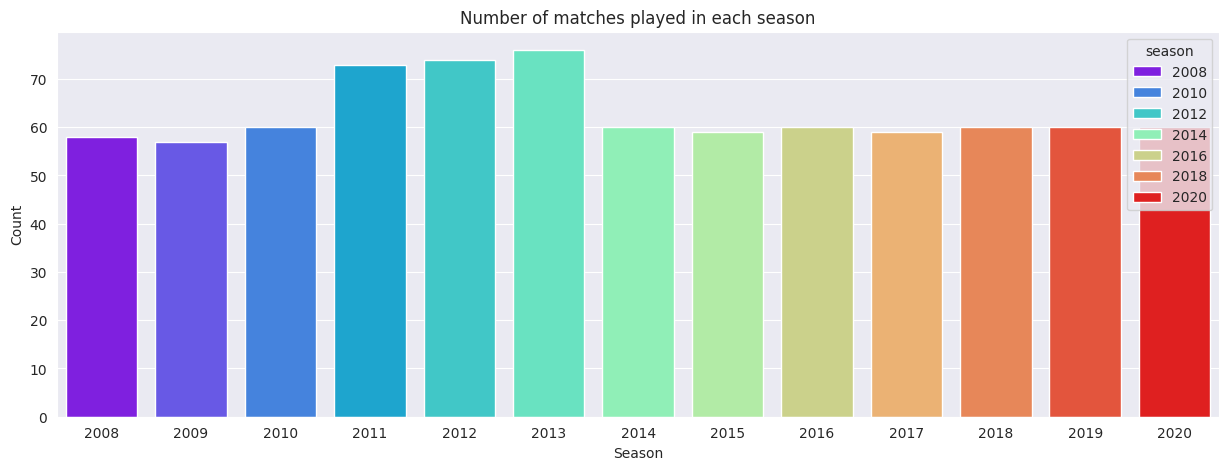

In [35]:
plt.figure(figsize=(15, 5))
sns.countplot(data= df_matches, x= "season", hue="season", palette="rainbow")
plt.title("Number of matches played in each season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

### Observations

* 2011, 2012 and 2013 seasons has number of matches above **70**.
* **2013** season has the highest number of matches that is **76**.
* **2009** season has the lowest number of matches that is **57**.

### Merge or Join two datasets

We will merge two datasets on the common column **id**, which represents the match id, so that we query from both datasets.

In [36]:
df_matches["id"].nunique(), df_ball["id"].nunique()

(816, 816)

> As both datasets have same number of unique values in **id** i.e. 816, so we can use inner join to merge the datasets. It only includes rows with keys that are present in both DataFrames.

In [37]:
df_merged = pd.merge(df_matches, df_ball, on="id", how="inner")

In [38]:
df_merged.shape

(193467, 36)

2. How many runs were scored in each season?

In [39]:
# Group by season and calculate sum of total_runs
season_runs = df_merged.groupby("season")["total_runs"].sum().reset_index()
season_runs

,season,total_runs
0,2008,17937
1,2009,16320
2,2010,18863
3,2011,21154
4,2012,22453
5,2013,22541
6,2014,18909
7,2015,18332
8,2016,18862
9,2017,18769


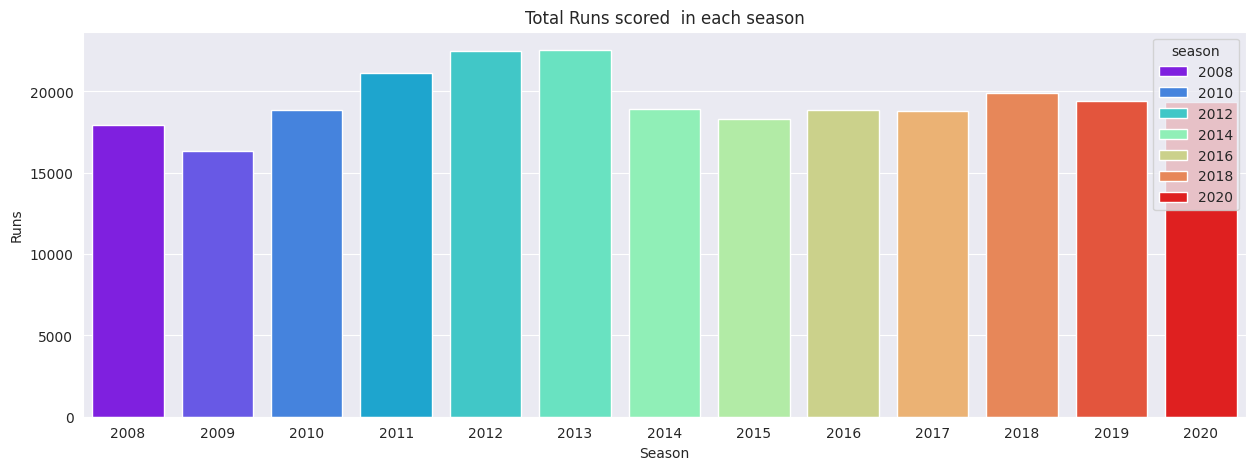

In [40]:
plt.figure(figsize=(15, 5))
sns.barplot(data= season_runs, x="season", y= "total_runs", hue="season", palette="rainbow")
plt.title("Total Runs scored  in each season")
plt.xlabel("Season")
plt.ylabel("Runs")
plt.show()

### Observations

* In 2011, 2012 and 2013 seasons total runs scored above **20000**.
* **2013** season has the maximum total runs scored that is **22541**.
* **2009** season has the minimum total runs scored that is **16320**.

3. What were the runs scored per match in different seasons?

> We will find the average run scored per match in each season.

In [41]:
season_runs_per_match = df_merged.groupby("season")["total_runs"].sum()/df_matches["season"].value_counts()
season_runs_per_match = season_runs_per_match.reset_index()
season_runs_per_match.rename(columns= {0: "run_per_match"}, inplace=True)
season_runs_per_match.sort_values(by="run_per_match")


,season,run_per_match
1,2009,286.315789
3,2011,289.780822
5,2013,296.592105
4,2012,303.418919
0,2008,309.258621
7,2015,310.711864
8,2016,314.366667
2,2010,314.383333
6,2014,315.150000
9,2017,318.118644


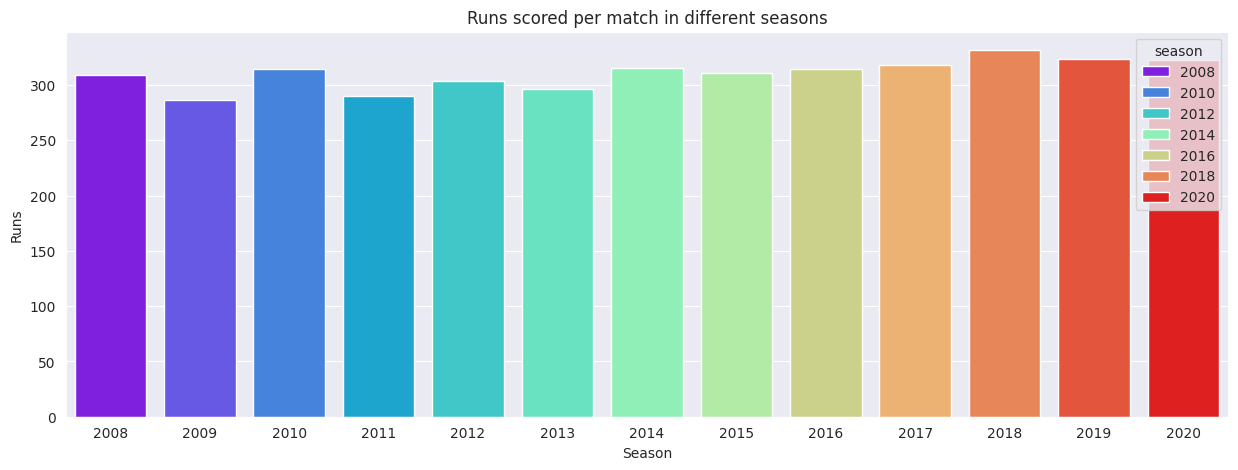

In [42]:
plt.figure(figsize=(15, 5))
sns.barplot(data=season_runs_per_match, x= "season", y="run_per_match", hue= "season", palette="rainbow")
plt.title("Runs scored per match in different seasons")
plt.xlabel("Season")
plt.ylabel("Runs")
plt.show()

### Observations

* Run scored  per match in **2018** is the maximum that is **331**.
* Run scored  per match in **2009** is the minimum that is **286**.

4. Who has umpired the most?

In [43]:
# Concatenate umpire1 and umpire2 into a single series
df_umpire = pd.concat([df_matches["umpire1"], df_matches["umpire2"]])
# Count occurances of each umpire
umpire_counts = df_umpire.value_counts()
# Find the umpire with the highest count
umpire_name = umpire_counts.idxmax()
matches = umpire_counts.max()
print(f"The umpire with the most matches is {umpire_name} with {matches} matches")


The umpire with the most matches is S Ravi with 121 matches


### Observations

* The umpire **S Ravi** umpired most mathches in all seasons. His number of matches are **121**.

5. Which team has won the most tosses?

In [44]:
# Cout toss wins for each team
toss_win_teams = df_matches["toss_winner"].value_counts()

# Find the team who won highest number of tosses
team = toss_win_teams.idxmax()
tosses = toss_win_teams.max()
print(f"The team {team} has won the most tosses with {tosses} tosses")

The team Mumbai Indians has won the most tosses with 106 tosses


### Observations

* The team **Mumbai Indians** has won the most tosses. The number of tosses won **106**.

6. What does the team decide after winning the toss?

In [45]:
# Count the decision taken by the team after winning the toss
df_matches["toss_decision"].value_counts()

toss_decision
field    496
bat      320
Name: count, dtype: int64

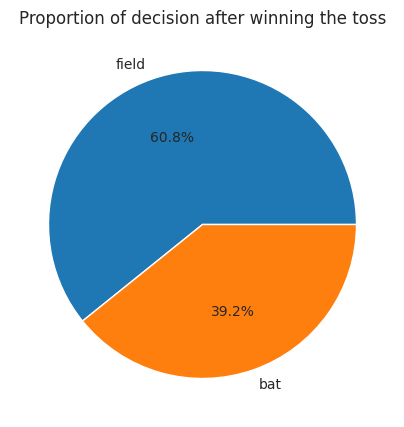

In [46]:
plt.figure(figsize=(5, 5))
plt.pie(df_matches["toss_decision"].value_counts(), labels= df_matches["toss_decision"].value_counts().index, autopct= "%1.1f%%")
plt.title("Proportion of decision after winning the toss")
plt.show()

### Observations

* **60.8%** times the decided to **field** first after winning the toss.

7. How does the toss decision vary across seasons?

In [47]:
# Group by "season" and count "toss_decision" values
season_toss_decision = df_matches.groupby("season")["toss_decision"].value_counts()
# Pivot the tables so that 'toss_decision' values become column
season_toss_decision = season_toss_decision.unstack()
# Remove the name for the columns
season_toss_decision.columns.name = None
# Reset the index so that "season" turn into a column
season_toss_decision.reset_index(inplace=True)
# Rename the columns for more clarity
season_toss_decision.columns = ["season", "bat_first", "field_first"]
season_toss_decision

,season,bat_first,field_first
0,2008,26,32
1,2009,35,22
2,2010,39,21
3,2011,25,48
4,2012,37,37
5,2013,45,31
6,2014,19,41
7,2015,25,34
8,2016,11,49
9,2017,11,48


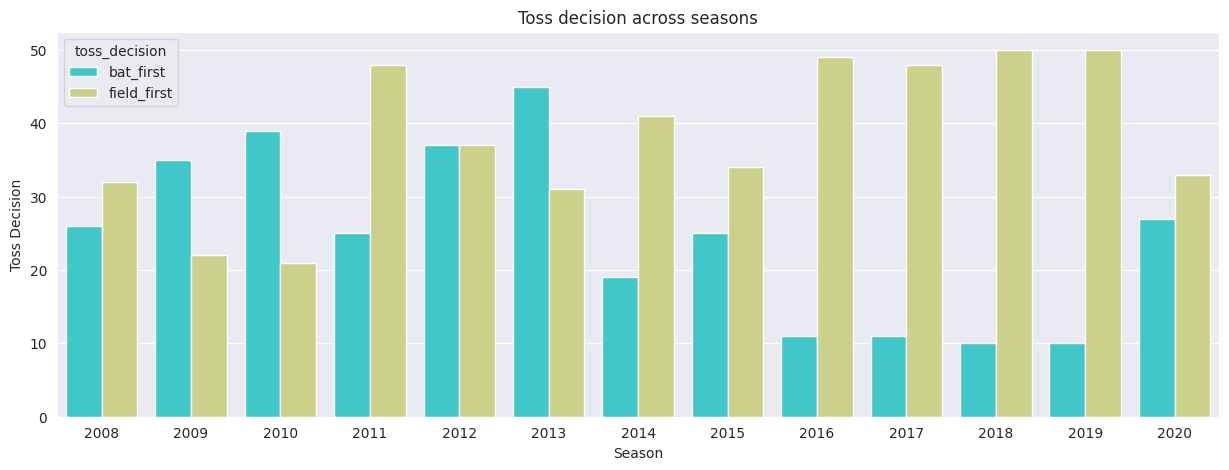

In [48]:
plt.figure(figsize=(15, 5))
# Melt the dataframe into long format for plot with seaborn
season_toss_melted = season_toss_decision.melt(id_vars="season", value_vars =["bat_first", "field_first"], var_name="toss_decision", value_name= "count")
# Plot variation of decision accross season
sns.barplot(data=season_toss_melted, x="season", y="count", hue="toss_decision", palette="rainbow")
plt.title("Toss decision across seasons")
plt.xlabel("Season")
plt.ylabel("Toss Decision")
plt.show()

### Observations

* In most of the season the team winning toss **fielded** first. Exception are **2009, 2010, 2012** and **2013**.

8. Does winning the toss imply winning the game?

In [49]:
# Find winning the toss winning the match
toss_win_matches = df_matches["toss_winner"] == df_matches["winner"]
# Calculate percentage of winning matches after winning the toss
percentage_win = toss_win_matches.sum() / df_matches.shape[0] * 100
print(f"Winning the toss implies winning the game {percentage_win : .2f}% of the time.")


Winning the toss implies winning the game  51.23% of the time.


### Observations

* **51.23%** macthes won by the team who won the **toss**.

9. How many times has the chasing team won the match?

In [50]:
# Find number of times result of match is "wickets"
won = df_matches[df_matches["result"] == "wickets"].shape[0]
print(f"Number of times chasing team won the match: {won} ({won/df_matches.shape[0] * 100 : .2f}%).")

Number of times chasing team won the match: 435 ( 53.31%).


### Observations

* The number of matches won by the chasing team is **435**, that is **53.31%** mtches won by the team who batted 2nd in the match.

10. Which all teams had won this tournament?

In [51]:
# Sort the matches on season and date
match_sorted = df_matches.sort_values(by=["season", "date"])
# Find the the last match of each season as last match is the final of each season
final_matches = match_sorted.groupby("season").tail(1).reset_index(drop=True)
# Show the winners of the final matches as those teams are winners of the tournament for the season
tournament_winners = final_matches[["season", "winner"]]
tournament_winners

,season,winner
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


In [52]:
teams = tournament_winners["winner"].unique()
print("=" * 60)
print(f"The teams who won the tournament")
print("=" * 60)
for team in teams:
  print(team)
print("=" * 60)

The teams who won the tournament
Rajasthan Royals
Deccan Chargers
Chennai Super Kings
Kolkata Knight Riders
Mumbai Indians
Sunrisers Hyderabad


11. Which team has played the most number of matches?

In [53]:
# Concatenate "team1" and "team2" into a single series
teams = pd.concat([df_matches["team1"], df_matches["team2"]])
# Count the values for each team
team_counts = teams.value_counts()
# Fid the team who played hieghest number of matches
team = team_counts.idxmax()
matches = team_counts.max()
print(f"The team {team} has played most number of matches: {matches}")

The team Mumbai Indians has played most number of matches: 203


### Observations

* **Mumbai Indians** has played most number of matches in the tournament. This team has played total **203** mathches.

12. Which team has won the most number of times?

In [54]:
winners = df_matches["winner"].value_counts()
winners

winner
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
No Team                          4
Name: count, dtype: int64

In [55]:
# Get name of the team
team = winners.idxmax()
# Get number of wins
no_of_wins = winners.max()
print(f"The team {team} has won the most number of times: {no_of_wins}")

The team Mumbai Indians has won the most number of times: 120


### Observations

* **Mumbai Indians** has won most number of times. The number of matches they won are **120**.

13. Which team has the highest winning percentage?

In [56]:
# Calculate the percentage of win for each team
winning_percentages = df_matches["winner"].value_counts() /df_matches.shape[0] * 100
winning_percentages

winner
Mumbai Indians                 14.705882
Chennai Super Kings            12.990196
Kolkata Knight Riders          12.132353
Royal Challengers Bangalore    11.151961
Kings XI Punjab                10.784314
Rajasthan Royals                9.926471
Delhi Daredevils                8.210784
Sunrisers Hyderabad             8.088235
Deccan Chargers                 3.553922
Delhi Capitals                  2.328431
Gujarat Lions                   1.593137
Pune Warriors                   1.470588
Rising Pune Supergiant          1.225490
Kochi Tuskers Kerala            0.735294
Rising Pune Supergiants         0.612745
No Team                         0.490196
Name: count, dtype: float64

In [57]:
# Get the team having highest winning percentage
team = winning_percentages.idxmax()
percentage = winning_percentages.max()
print(f"The team {team} has the highest winning percentage: {percentage : .2f}%")

The team Mumbai Indians has the highest winning percentage:  14.71%


### Observations

* **Mumbai Indians** has the highest winning percentage. The percentage of matches are **14.71%**.

14. Is there any lucky venue for a particular team?

In [58]:
# Find number of matches played by each team in each venue
team_matches = df_matches.melt(id_vars=['venue', "winner"],
                           value_vars=['team1', 'team2'],
                           var_name='team_type',
                           value_name='team')

team_venue = team_matches.groupby(["venue", "team"]).size().reset_index(name= "match_count")
team_venue.columns = ["venue", "team", "matches"]
team_venue.sort_values(by="matches", ascending=False)


,venue,team,matches
61,Eden Gardens,Kolkata Knight Riders,74
313,Wankhede Stadium,Mumbai Indians,67
72,Feroz Shah Kotla,Delhi Daredevils,63
128,M Chinnaswamy Stadium,Royal Challengers Bangalore,61
139,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,56
...,...,...,...
56,Eden Gardens,Delhi Capitals,1
209,"Rajiv Gandhi International Stadium, Uppal",Delhi Capitals,1
60,Eden Gardens,Kochi Tuskers Kerala,1
63,Eden Gardens,Pune Warriors,1


In [59]:
# Find number of wins by the teams in each venue
winner_venue = df_matches.groupby("winner")["venue"].value_counts().reset_index()
winner_venue.columns = ["team", "venue", "wins"]
winner_venue.sort_values(by="wins", ascending=False)


,team,venue,wins
116,Kolkata Knight Riders,Eden Gardens,45
138,Mumbai Indians,Wankhede Stadium,42
0,Chennai Super Kings,"MA Chidambaram Stadium, Chepauk",40
174,Rajasthan Royals,Sawai Mansingh Stadium,32
233,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",30
...,...,...,...
161,Mumbai Indians,Saurashtra Cricket Association Stadium,1
160,Mumbai Indians,"Punjab Cricket Association IS Bindra Stadium, ...",1
159,Mumbai Indians,Newlands,1
158,Mumbai Indians,M.Chinnaswamy Stadium,1


In [60]:
# Merge both and find percentage of each wins in each venue(Played minimum 20 mathces in a venue)
# by each team and get the top 5 win percentages
team_venue_matches_wins = pd.merge(team_venue, winner_venue, on=["venue", "team"])
team_venue_matches_wins["win_percentage"] = team_venue_matches_wins["wins"] / team_venue_matches_wins["matches"] * 100
lucky_venue_team = team_venue_matches_wins[team_venue_matches_wins["matches"] > 20].sort_values(by=[ "win_percentage","matches"], ascending=False).head()
lucky_venue_team

,venue,team,matches,wins,win_percentage
106,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,56,40,71.428571
167,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,44,30,68.181818
187,Sawai Mansingh Stadium,Rajasthan Royals,47,32,68.085106
242,Wankhede Stadium,Mumbai Indians,67,42,62.686567
45,Eden Gardens,Kolkata Knight Riders,74,45,60.810811


In [61]:
print("=" * 100)
print("Lucky Venue for Teams")
print("=" * 100)
for index, row in lucky_venue_team.iterrows():
  print(f"* {row['venue']} is lucky for {row['team']} as they won {row['win_percentage'] :.2f}% of matches here.\n")
print("=" * 100)


Lucky Venue for Teams
* MA Chidambaram Stadium, Chepauk is lucky for Chennai Super Kings as they won 71.43% of matches here.

* Rajiv Gandhi International Stadium, Uppal is lucky for Sunrisers Hyderabad as they won 68.18% of matches here.

* Sawai Mansingh Stadium is lucky for Rajasthan Royals as they won 68.09% of matches here.

* Wankhede Stadium is lucky for Mumbai Indians as they won 62.69% of matches here.

* Eden Gardens is lucky for Kolkata Knight Riders as they won 60.81% of matches here.



### Observations
* **MA Chidambaram Stadium, Chepauk** is lucky for **Chennai Super Kings** as they won **71.43%** of matches here.

* **Rajiv Gandhi International Stadium, Uppal** is lucky for **Sunrisers Hyderabad** as they won **68.18%** of matches here.

* **Sawai Mansingh Stadium** is lucky for **Rajasthan Royals** as they won **68.09%** of matches here.

* **Wankhede Stadium** is lucky for **Mumbai Indians** as they won **62.69%** of matches here.

* **Eden Gardens** is lucky for **Kolkata Knight Riders** as they won **60.81%** of matches here.

15. Innings wise comparison between teams.

> To compare teams on an innings-wise basis, we need to calculate various statistics like runs scored, wickets taken, and other relevant metrics for each team in each innings. Here's a step-by-step approach to achieve this:

In [78]:
# Group the team with total runs scored in batted first and bated 2nd and also the number of matches they batted 1st and 2nd
innings_runs = df_ball.groupby(["batting_team", "inning"]).agg(
    runs_scored=("total_runs", "sum"),
    matches=("id", "nunique")
).reset_index()
# Calculate average runs scored batted 1st and 2nd.
innings_runs["runs_per_match"] = round(innings_runs["runs_scored"] / innings_runs["matches"]).astype("int64")
innings_runs

,batting_team,inning,runs_scored,matches,runs_per_match
0,Chennai Super Kings,1,15344,93,165
1,Chennai Super Kings,2,13019,85,153
2,Deccan Chargers,1,6765,43,157
3,Deccan Chargers,2,4698,32,147
4,Delhi Capitals,1,2860,17,168
5,Delhi Capitals,2,2436,16,152
6,Delhi Daredevils,1,11247,72,156
7,Delhi Daredevils,2,13038,89,146
8,Gujarat Lions,1,2267,14,162
9,Gujarat Lions,2,2589,16,162


In [79]:
# Pivot the team and average runs scored in each match batted 1st and 2nd inning
innings_runs_pivot = innings_runs.pivot(index="batting_team", columns="inning", values="runs_per_match").reset_index()
innings_runs_pivot.columns = ["team", "inning1", "inning2"]
innings_runs_pivot

,team,inning1,inning2
0,Chennai Super Kings,165,153
1,Deccan Chargers,157,147
2,Delhi Capitals,168,152
3,Delhi Daredevils,156,146
4,Gujarat Lions,162,162
5,Kings XI Punjab,162,154
6,Kochi Tuskers Kerala,144,127
7,Kolkata Knight Riders,160,147
8,Mumbai Indians,167,150
9,Pune Warriors,149,135


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Chennai Super Kings'),
  Text(1, 0, 'Deccan Chargers'),
  Text(2, 0, 'Delhi Capitals'),
  Text(3, 0, 'Delhi Daredevils'),
  Text(4, 0, 'Gujarat Lions'),
  Text(5, 0, 'Kings XI Punjab'),
  Text(6, 0, 'Kochi Tuskers Kerala'),
  Text(7, 0, 'Kolkata Knight Riders'),
  Text(8, 0, 'Mumbai Indians'),
  Text(9, 0, 'Pune Warriors'),
  Text(10, 0, 'Rajasthan Royals'),
  Text(11, 0, 'Rising Pune Supergiant'),
  Text(12, 0, 'Rising Pune Supergiants'),
  Text(13, 0, 'Royal Challengers Bangalore'),
  Text(14, 0, 'Sunrisers Hyderabad')])

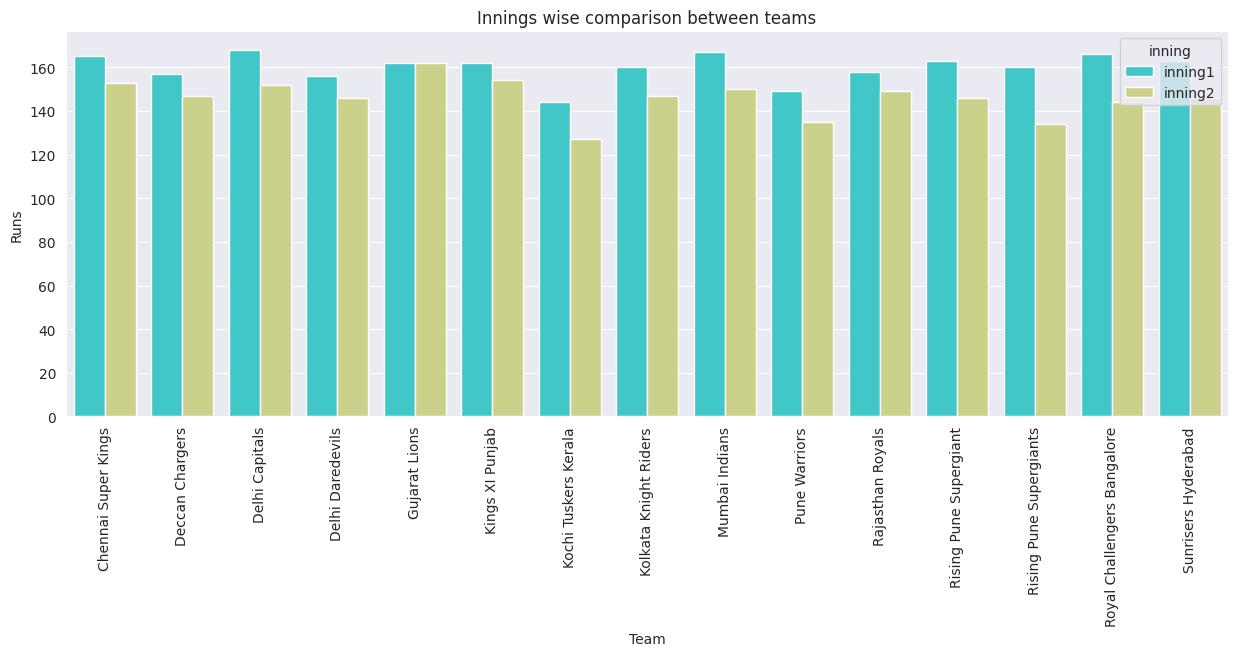

In [85]:
# Melt the data for plotting
innings_runs_melted = innings_runs_pivot.melt(id_vars="team",
                                              value_vars=["inning1", "inning2"],
                                              var_name="inning",
                                              value_name="Runs"
                                              )

# Plot the melted data
plt.figure(figsize=(15, 5))
sns.barplot(data=innings_runs_melted, x="team", y= "Runs", hue="inning", palette="rainbow")
plt.title("Innings wise comparison between teams")
plt.xlabel("Team")
plt.ylabel("Runs")
plt.xticks(rotation=90)

### Observations

* All the teams scored higher in inning 1 than in inning 2.

16. Which team has scored the most number of 200+ scores?

In [86]:
run_scored_above_200 = innings_summary[innings_summary["runs_scored"] >= 200].groupby("batting_team")["runs_scored"].count()
# The team scored most number of 200+ score in an innings
team= run_scored_above_200.idxmax()
# Number of times scored 200+
count = run_scored_above_200.max()
print(f"The team {team} has scored the most number of 200+ scores: {count}")

The team Royal Challengers Bangalore has scored the most number of 200+ scores: 19


### Observations

* **Royal Challengers Bangalore** has scored the most number of 200+ scores. They scored **19** times.

17. Which team has conceded 200+ scores the most?

In [87]:
bowling_inning_summary = df_ball.groupby(['id', 'bowling_team']).agg(
    runs_conceded=("total_runs", "sum")
).reset_index()
bowling_inning_summary

,id,bowling_team,runs_conceded
0,335982,Kolkata Knight Riders,82
1,335982,Royal Challengers Bangalore,222
2,335983,Chennai Super Kings,207
3,335983,Kings XI Punjab,240
4,335984,Delhi Daredevils,129
...,...,...,...
1625,1237178,Sunrisers Hyderabad,131
1626,1237180,Delhi Capitals,172
1627,1237180,Sunrisers Hyderabad,189
1628,1237181,Delhi Capitals,157


In [88]:
run_conceded_above_200 = bowling_inning_summary[bowling_inning_summary["runs_conceded"] >= 200].groupby("bowling_team")["runs_conceded"].count()
# The team conceded most number of 200+ score in an innings
team= run_conceded_above_200.idxmax()
# Number of times concided 200+
count = run_conceded_above_200.max()
print(f"The team {team} has conceded the most number of 200+ scores: {count}")

The team Kings XI Punjab has conceded the most number of 200+ scores: 20


### Observations

* **Kings XI Punjab** has conceded the most number of 200+ scores. They conceded **20** times.

18. What was the highest run scored by a team in a single match?

In [89]:
# Find highest run scored by each team in an inning
highest_score = innings_summary.groupby("batting_team")["runs_scored"].max()
# The team scored highest score in an inning
team = highest_score.idxmax()
# Number of runs scored
score = highest_score.max()
print(f"The team {team} scored the highest score in an inning: {score}")

The team Royal Challengers Bangalore scored the highest score in an inning: 263


### Observations

* The highest run scored buy a team in a single match is **263** by **Royal Challengers Bangalore**.

19. Which is the biggest win in terms of run margin?

In [90]:
# Find the the biggest win in terms of run margin for each team
highest_margin_wins = df_matches[df_matches["result"] == 'runs'].groupby("winner")["result_margin"].max()
# Team won by the biggest run margin
team= highest_margin_wins.idxmax()
# Number of runs
margin = highest_margin_wins.max()
print(f"The team {team} won by the biggest run margin: {margin}")

The team Mumbai Indians won by the biggest run margin: 146.0


### Observations

* The biggest win in terms of run margin is **146** won by **Mumbai Indians**

20. Which batsmen have played the most number of balls?

In [91]:
# Find total number of balls played by each batsman
ball_palyed = df_ball["batsman"].value_counts()
# Batsman who played the most number of balls
batsman = ball_palyed.idxmax()
# Number of balls played
balls = ball_palyed.max()
print(f"The batsman {batsman} played the most number of balls: {balls}")

The batsman V Kohli played the most number of balls: 4609


### Observations

* **V Kohli** played the most number of balls He played total **4609** number of  balls.

21. Who are the leading run-scorers of all time?

In [92]:
# Find the sum of batsman_runs(total runs) scored grouping by the batsman and sorted in descending order(top 10)
leading_scorer = df_ball.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False).head(10).reset_index(name="runs_scored")

leading_scorer

,batsman,runs_scored
0,V Kohli,5878
1,SK Raina,5368
2,DA Warner,5254
3,RG Sharma,5230
4,S Dhawan,5197
5,AB de Villiers,4849
6,CH Gayle,4772
7,MS Dhoni,4632
8,RV Uthappa,4607
9,G Gambhir,4217


### Observations

* **V Kohli** is the leading runscorer of all time. he scored **5878** runs.

22. Who has hit the most number of 4's?

In [93]:
# Find the number of 4 hitted by each batsman in decending order
most_hitted_4 = df_ball[(df_ball["batsman_runs"] == 4)].groupby("batsman")["batsman_runs"].count().sort_values(ascending=False)
# Find the batsman who has hit most number of 4
batsman = most_hitted_4.idxmax()
# Find the value
count = most_hitted_4.max()
print(f"The batsman {batsman} has hit the most number of 4's: {count}")

The batsman S Dhawan has hit the most number of 4's: 591


### Observations

* **S Dhawan** has hit the most number of 4's. He has hit **591** 4's.

23. Who has hit the most number of 6's?

In [94]:
# Find the number of 6 hitted by each batsman in decending order
most_hitted_6 = df_ball[(df_ball["batsman_runs"] == 6)].groupby("batsman")["batsman_runs"].count().sort_values(ascending=False)
# Find the batsman who has hit most number of 6
batsman = most_hitted_6.idxmax()
# Find the value
count = most_hitted_6.max()
print(f"The batsman {batsman} has hit the most number of 6's: {count}")

The batsman CH Gayle has hit the most number of 6's: 349


### Observations

* **CH Gayle** has hit the most number of 6's. He has hit **349** 6's.

24. Who has the highest strike rate?

To calculate the strike rate of each batsman, we need to use the ball-by-ball data to find out the total runs scored by each batsman and the number of balls they faced. Then strike rate is calculated as follows:

**Strike Rate = (Total Runs Scored / Number of Balls Faced) * 100**

In [97]:
# Find the total runs scored and total ball faced by each batsman.
strike_rates = df_ball.groupby("batsman").agg(
    runs_scored=("batsman_runs", "sum"),
    balls_faced=("batsman", "count")
)
# Calculate the strike rate
strike_rates["strike_rate"] = (strike_rates["runs_scored"] / strike_rates["balls_faced"]) * 100
# Find the batsman has the highest strike rate who faced atleast 100 balls
strike_rates[strike_rates["balls_faced"] > 100 ].sort_values(by="strike_rate", ascending= False).head(1)

,runs_scored,balls_faced,strike_rate
batsman,,,
AD Russell,1517,882,171.995465


### Observations

* **AD Russell** has the highest strike rate. His strike rate is **172**

25. Who is the leading wicket-taker?

In [98]:
# Find the number of wickets taken by each bowler
wicket_takers = df_ball[df_ball["is_wicket"] == 1]["bowler"].value_counts()
# Find the bowler who has taken maximum wickets
bowler = wicket_takers.idxmax()
# The maximum number of wikets taken by the bowler
wickets = wicket_takers.max()
print(f"The bowler {bowler} has taken the highest number of wickets: {wickets}")

The bowler SL Malinga has taken the highest number of wickets: 188


### Observations

* **SL Malinga** is the leading wicket takers. He took **188** wickets in all seasons.

26. Which stadium has hosted the most number of matches?

In [99]:
# Find the number of matches played in each stedium(venue)
stedium_matches = df_matches["venue"].value_counts()
# Find name of the stedium(venue) whare maximum number of matches palyed
stedium = stedium_matches.idxmax()
# Maximum number of matches palyed in a stedium
matches = stedium_matches.max()
print(f"The stadium {stedium} has hosted the most number of matches: {matches}")

The stadium Eden Gardens has hosted the most number of matches: 77


### Observations

* **Eden Gardens** has hosted most number of matches. It hosted **77** matches in all seasons.

27. Who has won the most MOM awards?

In [100]:
# Calculate number of MOM(Man of the Match or Player of the match) awarded to each player
man_of_matches = df_matches["player_of_match"].value_counts()
# Find the name of the palyer who awarded maximum man of the matches
player = man_of_matches.idxmax()
# Number of MOM awards
awards = man_of_matches.max()
print(f"The player {player} has won the most MOM awards: {awards}")

The player AB de Villiers has won the most MOM awards: 23


### Observations

* **AB de Villiers** has won the most man of the match awards. He won **23** man of the match awards in all season.

28. What is the count of fours hit in each season?

In [101]:
# Count the number of 4's has hit in each season
seasons_4 = df_merged[df_merged["batsman_runs"]== 4]["season"].value_counts().reset_index()
seasons_4.columns = ["season", "count"]
seasons_4.sort_values(by = "count", ascending=False)

,season,count
0,2013,2052
1,2011,1916
2,2012,1911
3,2010,1708
4,2008,1703
5,2019,1653
6,2018,1652
7,2016,1633
8,2017,1611
9,2015,1607


Text(0, 0.5, 'Count')

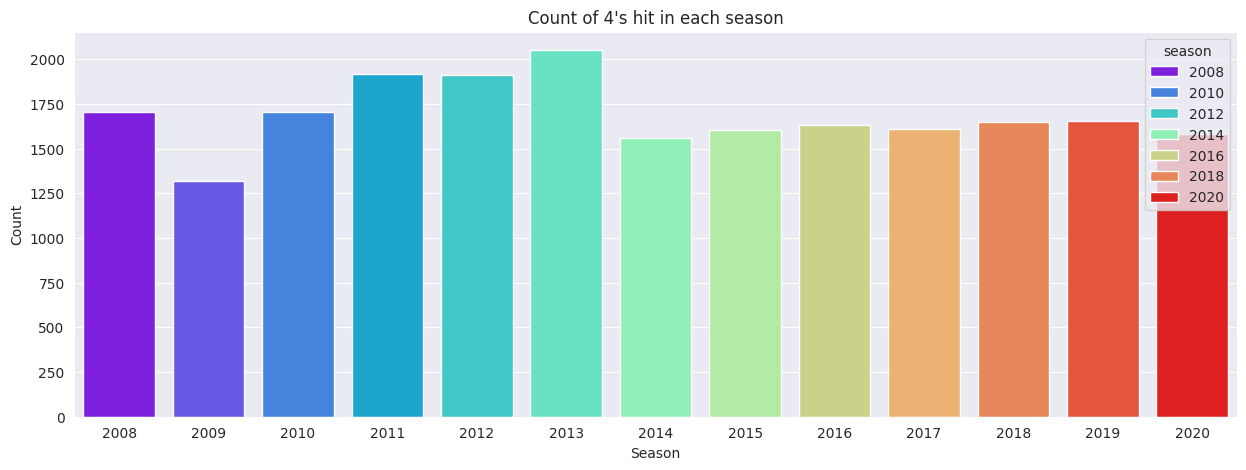

In [102]:
# Plot in bar chart
plt.figure(figsize=(15,5))
sns.barplot(data= seasons_4, x="season", y="count", hue="season", palette="rainbow")
plt.title("Count of 4's hit in each season")
plt.xlabel("Season")
plt.ylabel("Count")

### Observations

* In the season **2013** number of 4's has hit **2052**. This is the **most** number of 4's hit in one season.
* In the season **2009** number of 4's has hit **1317**. This is the **least** number of 4's hit in one season.

29. What is the count of sixes hit in each season?

In [103]:
# Count the number of 6's has hit in each season
seasons_6 = df_merged[df_merged["batsman_runs"]== 6]["season"].value_counts().reset_index()
seasons_6.columns = ["season", "count"]
seasons_6.sort_values(by = "count", ascending=False)

,season,count
0,2018,872
1,2019,784
2,2020,735
3,2012,733
4,2014,714
5,2017,705
6,2015,692
7,2013,675
8,2011,639
9,2016,639


Text(0, 0.5, 'Count')

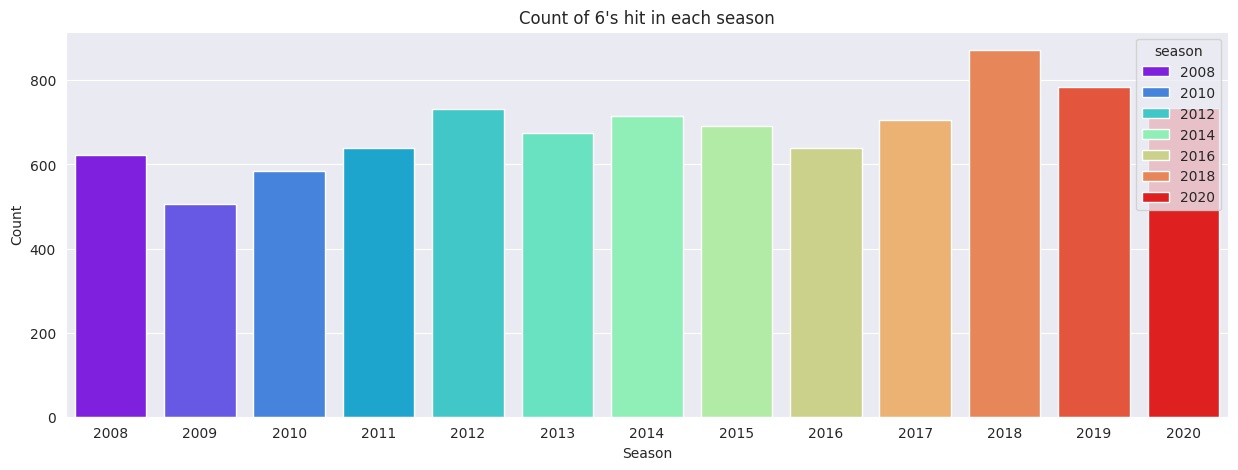

In [104]:
# Plot in bar chart
plt.figure(figsize=(15,5))
sns.barplot(data= seasons_6, x="season", y="count", hue="season", palette="rainbow")
plt.title("Count of 6's hit in each season")
plt.xlabel("Season")
plt.ylabel("Count")

### Observations

* In the season **2018** number of 6's has hit **872**. This is the **most** number of 6's hit in one season.
* In the season **2009** number of 6's has hit **506**. This is the **least** number of 6's hit in one season.

30. What is the count of runs scored from boundaries in each season?

In [105]:
# Count the number of boundaries has hit in each season
seasons_boundaries = df_merged[(df_merged["batsman_runs"]== 6) | (df_merged["batsman_runs"]== 4)]["season"].value_counts().reset_index()
seasons_boundaries.columns = ["season", "count"]
seasons_boundaries.sort_values(by = "count", ascending=False)

,season,count
0,2013,2727
1,2012,2644
2,2011,2555
3,2018,2524
4,2019,2437
5,2008,2326
6,2020,2318
7,2017,2316
8,2015,2299
9,2010,2293


Text(0, 0.5, 'Count')

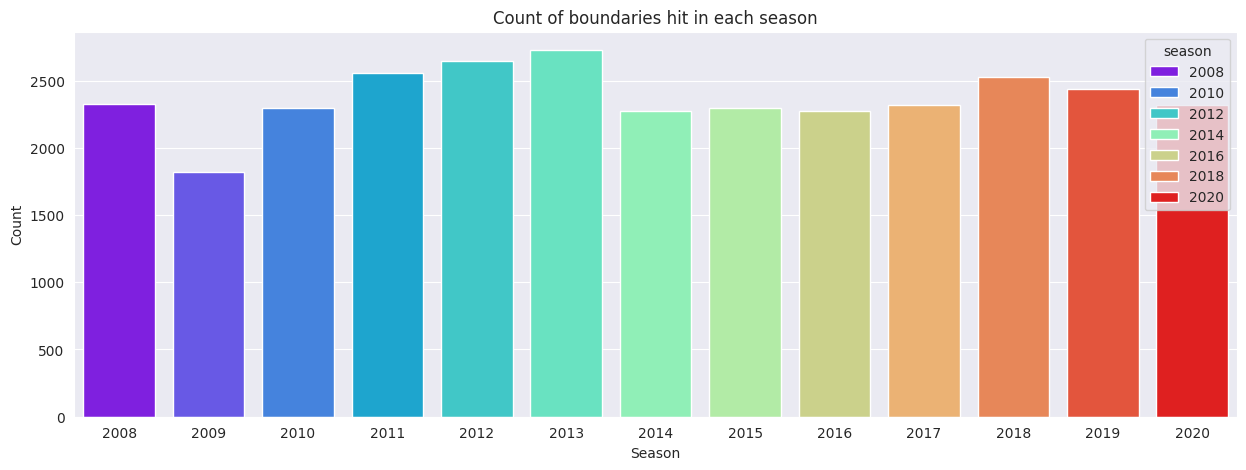

In [106]:
# Plot in bar chart
plt.figure(figsize=(15,5))
sns.barplot(data= seasons_boundaries, x="season", y="count", hue="season", palette="rainbow")
plt.title("Count of boundaries hit in each season")
plt.xlabel("Season")
plt.ylabel("Count")

### Observations

* In the season **2013** number of boundaries has hit **2727**. This is the **most** number of boundaries hit in one season.
* In the season **2009** number of boundaries has hit **1823**. This is the **least** number of boundaries hit in one season.

31. What is the run contribution from boundaries in each season?

In [107]:
# Count the number of boundaries has hit in each season
seasons_boundaries_runs = df_merged[df_merged["batsman_runs"].isin([4,6])].groupby("season")["batsman_runs"].sum().reset_index()
seasons_boundaries_runs.columns = ["season", "runs_from_boundary"]
seasons_boundaries_runs.sort_values(by = "runs_from_boundary", ascending=False)

,season,runs_from_boundary
5,2013,12258
4,2012,12042
10,2018,11840
3,2011,11498
11,2019,11316
12,2020,10742
9,2017,10674
7,2015,10580
0,2008,10550
6,2014,10532


Text(0, 0.5, 'Runs')

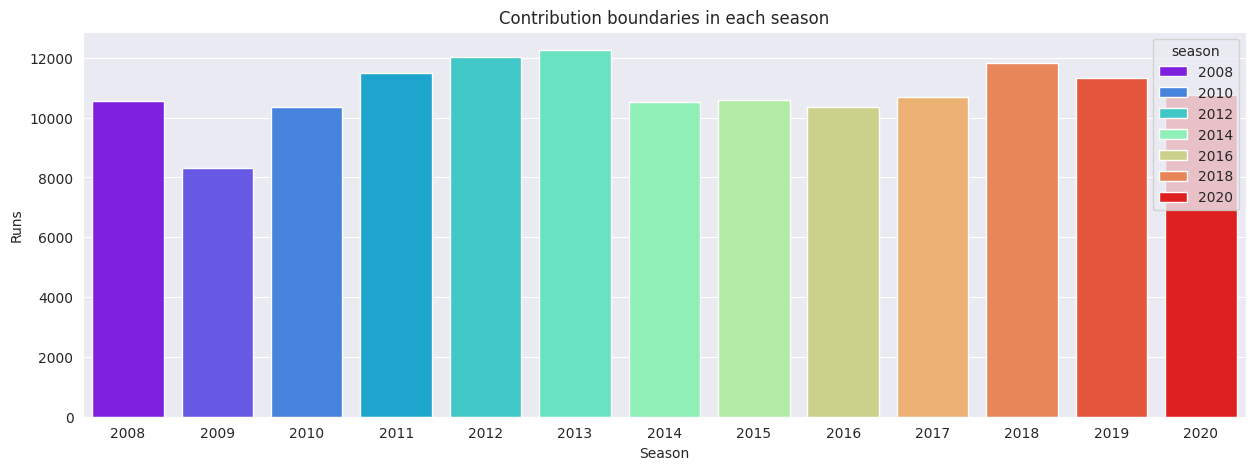

In [108]:
# Plot in bar chart
plt.figure(figsize=(15,5))
sns.barplot(data= seasons_boundaries_runs, x="season", y="runs_from_boundary", hue="season", palette="rainbow")
plt.title("Contribution boundaries in each season")
plt.xlabel("Season")
plt.ylabel("Runs")

### Observations

* In the season **2013** contribution of boundaries is **12258**. This is the **highest** contribution of boundaries in one season.
* In the season **2009** contribution of boundaries is **8304**. This is the **lowest** contribution of boundaries in one season.

32. Which team has scored the most runs in the first 6 overs?

In [109]:
# Find the total runs scored by each team in 1st 6 overs and number of mathes each team played.
runs_matches_6_overs= df_ball[df_ball["over"] <= 6].groupby("batting_team").agg(
    runs_scored=("total_runs", "sum"),
    matches=("id", "nunique")
).reset_index()
runs_matches_6_overs["runs_per_match"] = runs_matches_6_overs["runs_scored"] / runs_matches_6_overs["matches"]
runs_matches_6_overs.sort_values(by="runs_per_match", ascending=False).head(1)

,batting_team,runs_scored,matches,runs_per_match
4,Gujarat Lions,1812,30,60.4


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Chennai Super Kings'),
  Text(1, 0, 'Deccan Chargers'),
  Text(2, 0, 'Delhi Capitals'),
  Text(3, 0, 'Delhi Daredevils'),
  Text(4, 0, 'Gujarat Lions'),
  Text(5, 0, 'Kings XI Punjab'),
  Text(6, 0, 'Kochi Tuskers Kerala'),
  Text(7, 0, 'Kolkata Knight Riders'),
  Text(8, 0, 'Mumbai Indians'),
  Text(9, 0, 'Pune Warriors'),
  Text(10, 0, 'Rajasthan Royals'),
  Text(11, 0, 'Rising Pune Supergiant'),
  Text(12, 0, 'Rising Pune Supergiants'),
  Text(13, 0, 'Royal Challengers Bangalore'),
  Text(14, 0, 'Sunrisers Hyderabad')])

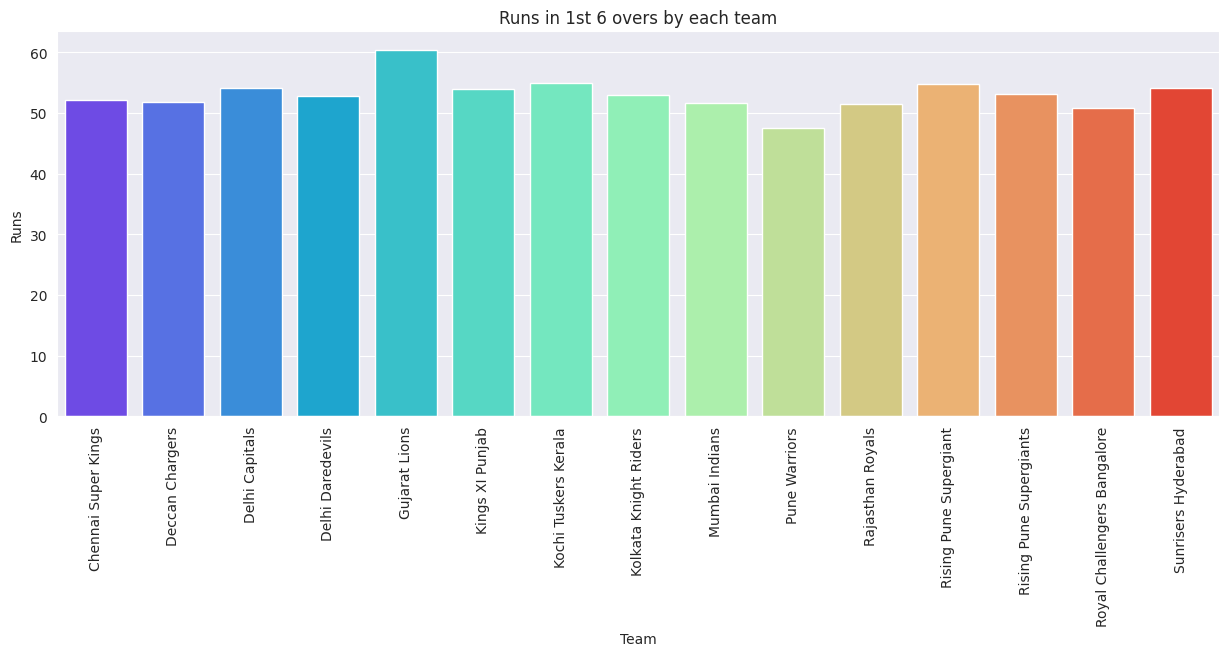

In [110]:
# Plot in bar chart
plt.figure(figsize=(15,5))
sns.barplot(data= runs_matches_6_overs, x="batting_team", y="runs_per_match", hue="batting_team", palette="rainbow")
plt.title("Runs in 1st 6 overs by each team")
plt.xlabel("Team")
plt.ylabel("Runs")
plt.xticks(rotation=90)

### Observations

* **Gujrat Lions** scored most runs in 1st 6 overs in a match. They scores **60** runs per match.

33. Which team has scored the most runs in the last 4 overs?

In [111]:
# Find the total runs scored by each team in last 4 overs(17-20) overs and number of mathes each team played.
runs_matches_last_4_overs= df_ball[df_ball["over"] > 16].groupby("batting_team").agg(
    runs_scored=("total_runs", "sum"),
    matches=("id", "nunique")
).reset_index()
runs_matches_last_4_overs["runs_per_match"] = runs_matches_last_4_overs["runs_scored"] / runs_matches_last_4_overs["matches"]
runs_matches_last_4_overs.sort_values(by="runs_per_match", ascending=False).head(1)

,batting_team,runs_scored,matches,runs_per_match
11,Rising Pune Supergiant,443,14,31.642857


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Chennai Super Kings'),
  Text(1, 0, 'Deccan Chargers'),
  Text(2, 0, 'Delhi Capitals'),
  Text(3, 0, 'Delhi Daredevils'),
  Text(4, 0, 'Gujarat Lions'),
  Text(5, 0, 'Kings XI Punjab'),
  Text(6, 0, 'Kochi Tuskers Kerala'),
  Text(7, 0, 'Kolkata Knight Riders'),
  Text(8, 0, 'Mumbai Indians'),
  Text(9, 0, 'Pune Warriors'),
  Text(10, 0, 'Rajasthan Royals'),
  Text(11, 0, 'Rising Pune Supergiant'),
  Text(12, 0, 'Rising Pune Supergiants'),
  Text(13, 0, 'Royal Challengers Bangalore'),
  Text(14, 0, 'Sunrisers Hyderabad')])

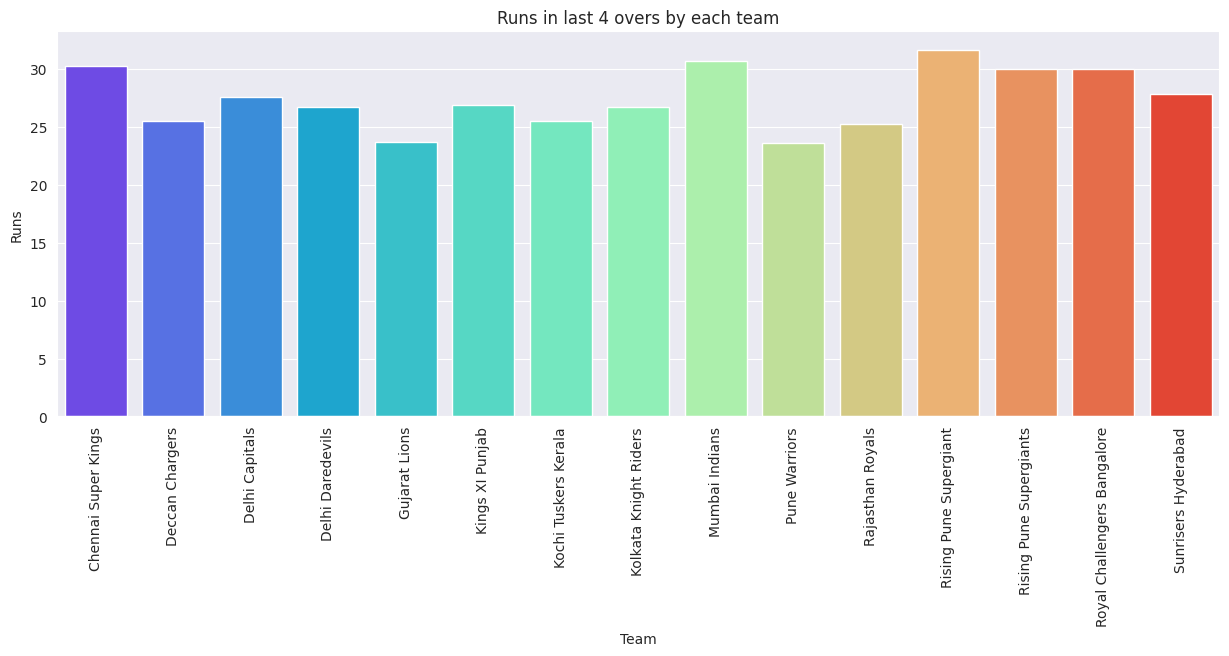

In [112]:
# Plot in bar chart
plt.figure(figsize=(15,5))
sns.barplot(data= runs_matches_last_4_overs, x="batting_team", y="runs_per_match", hue="batting_team", palette="rainbow")
plt.title("Runs in last 4 overs by each team")
plt.xlabel("Team")
plt.ylabel("Runs")
plt.xticks(rotation=90)

### Observations

* **Rising Pune Supergiant** scored most runs in last 4 overs in a match. They scores **31** runs per match.

34. Which team has the best scoring run-rate in the first 6 overs?

In [113]:
# Find runrates of each team in 1st 6 overs.
runs_matches_6_overs["runrate"] = runs_matches_6_overs["runs_per_match"] / 6
runs_matches_6_overs.sort_values(by="runrate", ascending=False).head(1)

,batting_team,runs_scored,matches,runs_per_match,runrate
4,Gujarat Lions,1812,30,60.4,10.066667


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Chennai Super Kings'),
  Text(1, 0, 'Deccan Chargers'),
  Text(2, 0, 'Delhi Capitals'),
  Text(3, 0, 'Delhi Daredevils'),
  Text(4, 0, 'Gujarat Lions'),
  Text(5, 0, 'Kings XI Punjab'),
  Text(6, 0, 'Kochi Tuskers Kerala'),
  Text(7, 0, 'Kolkata Knight Riders'),
  Text(8, 0, 'Mumbai Indians'),
  Text(9, 0, 'Pune Warriors'),
  Text(10, 0, 'Rajasthan Royals'),
  Text(11, 0, 'Rising Pune Supergiant'),
  Text(12, 0, 'Rising Pune Supergiants'),
  Text(13, 0, 'Royal Challengers Bangalore'),
  Text(14, 0, 'Sunrisers Hyderabad')])

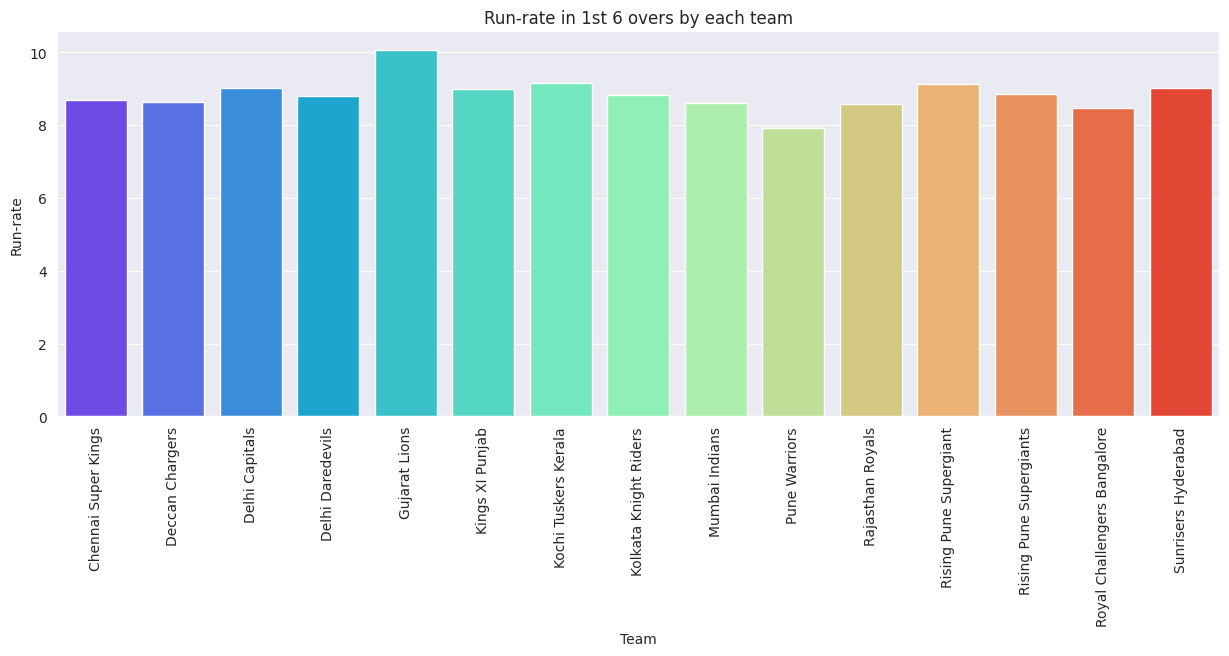

In [114]:
# Plot in bar chart
plt.figure(figsize=(15,5))
sns.barplot(data= runs_matches_6_overs, x="batting_team", y="runrate", hue="batting_team", palette="rainbow")
plt.title("Run-rate in 1st 6 overs by each team")
plt.xlabel("Team")
plt.ylabel("Run-rate")
plt.xticks(rotation=90)

### Observations

* **Gujrat Lions** has the best scoring run-rate in 1st 6 overs in a match. They scores **10** runs per over in a match in 1st 6 overs.

35. Which team has the best scoring run-rate in the last 4 overs?

In [115]:
# Find run-rates of each team in last 4 overs.
runs_matches_last_4_overs["runrate"] = runs_matches_last_4_overs["runs_per_match"] / 4
runs_matches_last_4_overs.sort_values(by="runrate", ascending=False).head(1)

,batting_team,runs_scored,matches,runs_per_match,runrate
11,Rising Pune Supergiant,443,14,31.642857,7.910714


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Chennai Super Kings'),
  Text(1, 0, 'Deccan Chargers'),
  Text(2, 0, 'Delhi Capitals'),
  Text(3, 0, 'Delhi Daredevils'),
  Text(4, 0, 'Gujarat Lions'),
  Text(5, 0, 'Kings XI Punjab'),
  Text(6, 0, 'Kochi Tuskers Kerala'),
  Text(7, 0, 'Kolkata Knight Riders'),
  Text(8, 0, 'Mumbai Indians'),
  Text(9, 0, 'Pune Warriors'),
  Text(10, 0, 'Rajasthan Royals'),
  Text(11, 0, 'Rising Pune Supergiant'),
  Text(12, 0, 'Rising Pune Supergiants'),
  Text(13, 0, 'Royal Challengers Bangalore'),
  Text(14, 0, 'Sunrisers Hyderabad')])

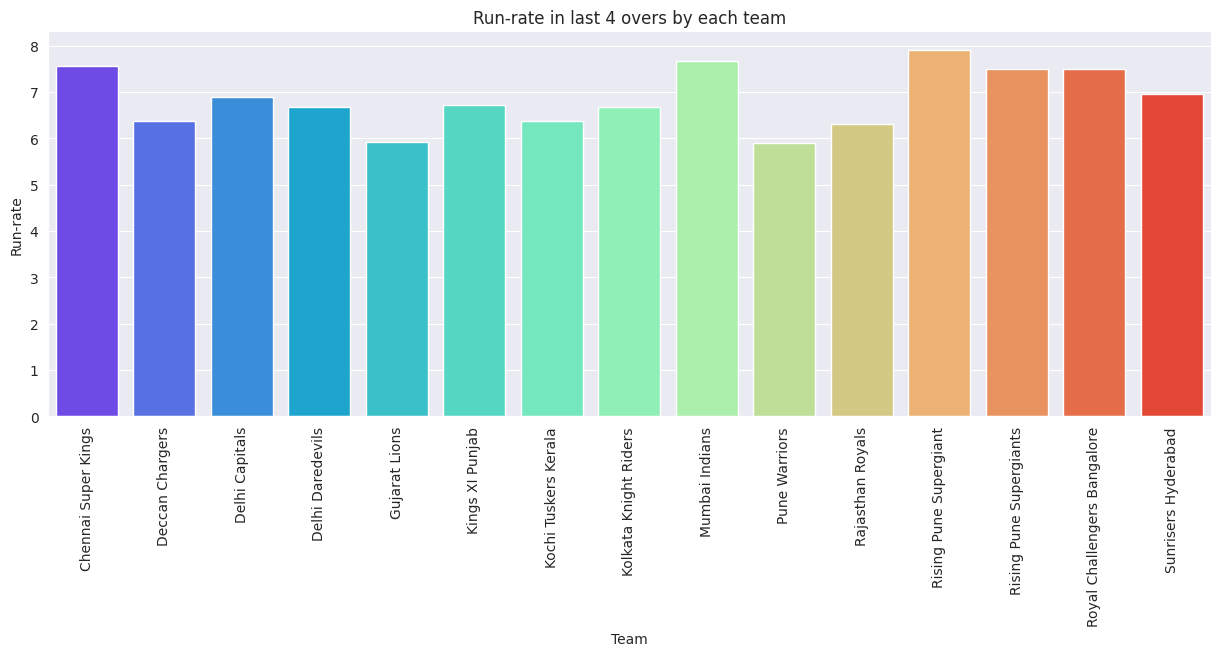

In [116]:
# Plot in bar chart
plt.figure(figsize=(15,5))
sns.barplot(data= runs_matches_last_4_overs, x="batting_team", y="runrate", hue="batting_team", palette="rainbow")
plt.title("Run-rate in last 4 overs by each team")
plt.xlabel("Team")
plt.ylabel("Run-rate")
plt.xticks(rotation=90)

### Observations

* **Rising Pune Supergiant** has the best scoring run-rate in last 4 overs in a match. They scores **7.91** runs per over in a match in last 4 overs.